**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

For our exam project we have used AI to optimize our code. More specifically we have used AI to structure the inner/outer loops in Problem 2 to efficiently loop through a large number of elements. Furthermore we have used AI to help us design specific elements of the plots in Problem 2 and Problem 3. However all steps throughout our project is commented and explained. 

In [85]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import pandas as pd
import matplotlib.pyplot as plt


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [ ]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [ ]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [ ]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [181]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [182]:
# We set seed for reproducibility
np.random.seed(11)

# Initialize an array to store the simulated utilities for each career. So we make an 2D array with dimensions 3 x 10000
utilities = np.zeros((par.J, par.K))

# We simulate the utilities for each career
for j in range(par.J):
    # We generate K random errors from a normal distribution with mean 0 and std deviation sigma
    epsilon = np.random.normal(0, par.sigma, par.K)
    # We calculate the utility for each simulation as the sum of v_j and epsilon
    utilities[j] = par.v[j] + epsilon

# Now we can calculate the expected utility for each career choice by taking the mean of the simulated utilities
expected_utilities = np.mean(utilities, axis=1)

# Calculate the average realized utility, which in this simulation is the same as expected utility 
average_realised_utilities = np.mean(utilities, axis=1)

# Displaying results in a table
results = pd.DataFrame({
    'Career Choice': np.arange(1, par.J + 1),
    'Expected Utility': expected_utilities,
    'Average Realized Utility': average_realised_utilities
})

results


,Career Choice,Expected Utility,Average Realized Utility
0,1,1.010800,1.010800
1,2,2.018892,2.018892
2,3,3.018605,3.018605


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

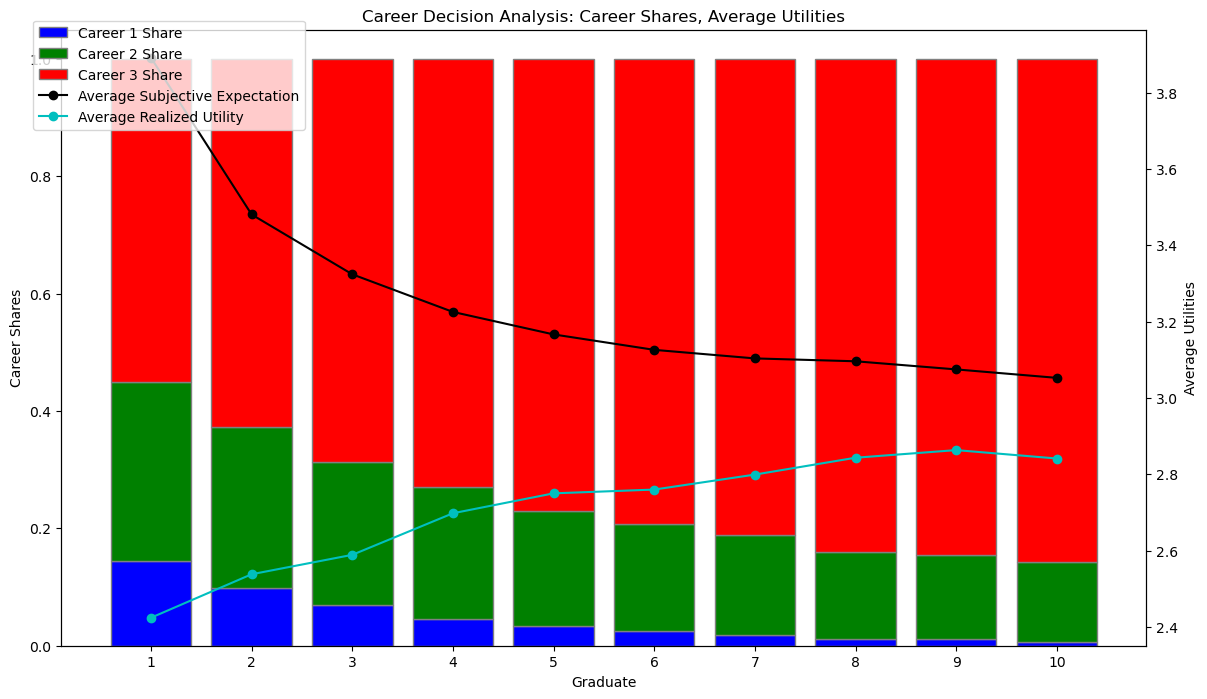

,Graduate,Career 1 Share,Career 2 Share,Career 3 Share,Average Subjective Expectation,Average Realized Utility
0,1,0.1452,0.3035,0.5513,3.891879,2.423885
1,2,0.0979,0.2747,0.6274,3.480900,2.537857
2,3,0.0699,0.2425,0.6876,3.324106,2.588745
3,4,0.0463,0.2236,0.7301,3.225496,2.697743
4,5,0.0332,0.1971,0.7697,3.166544,2.749910
5,6,0.0244,0.1831,0.7925,3.126093,2.759839
6,7,0.0176,0.1712,0.8112,3.103645,2.799087
7,8,0.0121,0.1484,0.8395,3.096128,2.843288
8,9,0.0111,0.1440,0.8449,3.074828,2.863279
9,10,0.0061,0.1361,0.8578,3.052662,2.841243


In [183]:
# Set seed for reproducibility
np.random.seed(11)

# We set up empty arrays to store our simulation results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expectation = np.zeros((par.N, par.K))
realized_value = np.zeros((par.N, par.K))

# Now we simulate for each graduate
for i in range(par.N):
    Fi = par.F[i]  # Number of friends for graduate i
    prior_utilities = np.zeros((par.J, par.K)) #To store prior utilities
    
    # Draw J * Fi values of epsilon for each career
    for j in range(par.J):
        friend_epsilon = np.random.normal(0, par.sigma, (Fi, par.K)) #We make a matrix of random values, where the shape of the matrix is given by number of friends Fi and K. Each element in the matrix is epsilon for friend f in career j for k simulation. 
        own_epsilon = np.random.normal(0, par.sigma, par.K) #Matrix of epsilon for graduate i in career j for simulation k
        # Now we can calculate prior expected utility, which is a result of v and the mean of the epsilons of the friends up until the given point
        prior_utilities[j] = par.v[j] + np.mean(friend_epsilon, axis=0) #We use axis=0 to get averages for collumns independently meaning that we get mean epsilons for friends for each simulation. 
    
    # Graduate chooses the career with the highest expected utility
    chosen_career = np.argmax(prior_utilities, axis=0) 
    # Then we store the chosen career, for all graduate i maximizing its utility. We store this in the array from we defined earlier
    chosen_careers[i] = chosen_career
    
    # Store the prior expectation of the value of the chosen career and the realized value of the chosen career
    for k in range(par.K):
        prior_expectation[i, k] = prior_utilities[chosen_career[k], k]
        # Realized value includes v and the graduate's own epsilon
        realized_value[i, k] = par.v[chosen_career[k]] + np.random.normal(0, par.sigma)

# Storing results by storing them in empty arrays
career_shares = np.zeros((par.N, par.J)) # This array has to be 2D as we have 3 career choices and 10 graduates
# The following two only needs 1D as it is an single average of values
average_subjective_expectation = np.zeros(par.N) 
average_realized_utility = np.zeros(par.N)

#Now we loop over all graduates(number of friends), i, and career choices, j, and get averages for career shares, average subjective expactation of value and average realized utility
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(chosen_careers[i] == j) #here we create a boolean that only returns chosen career if the choice is j
    average_subjective_expectation[i] = np.mean(prior_expectation[i])
    average_realized_utility[i] = np.mean(realized_value[i])

# Arranging results for table and plot
display_data = {
    'Graduate': np.arange(1, par.N + 1),
    'Career 1 Share': career_shares[:, 0],
    'Career 2 Share': career_shares[:, 1],
    'Career 3 Share': career_shares[:, 2],
    'Average Subjective Expectation': average_subjective_expectation,
    'Average Realized Utility': average_realized_utility
}

# Creating a DataFrame for the data we want to display
display_data_df = pd.DataFrame(display_data)

# Now we want to plot the results
fig, ax1 = plt.subplots(figsize=(14, 8))
# Stacked bar plots for career shares
ax1.bar(display_data_df['Graduate'], display_data_df['Career 1 Share'], color='b', edgecolor='grey', label='Career 1 Share')
ax1.bar(display_data_df['Graduate'], display_data_df['Career 2 Share'], bottom=display_data_df['Career 1 Share'], color='g', edgecolor='grey', label='Career 2 Share')
ax1.bar(display_data_df['Graduate'], display_data_df['Career 3 Share'], bottom=display_data_df['Career 1 Share'] + display_data_df['Career 2 Share'], color='r', edgecolor='grey', label='Career 3 Share')
# Line plots for Average Subjective Expectation and Average Realized Utility
ax2 = ax1.twinx()
ax2.plot(np.arange(1, par.N + 1), display_data_df['Average Subjective Expectation'], color='k', marker='o', label='Average Subjective Expectation')
ax2.plot(np.arange(1, par.N + 1), display_data_df['Average Realized Utility'], color='c', marker='o', label='Average Realized Utility')
# Setting up the plot
ax1.set_xlabel('Graduate')
ax1.set_ylabel('Career Shares')
ax2.set_ylabel('Average Utilities')
ax1.set_xticks(np.arange(1, par.N + 1))
ax1.set_xticklabels(np.arange(1, par.N + 1))
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Career Decision Analysis: Career Shares, Average Utilities')
plt.show()

# Displaying the table
display_data_df

Comment: We see that as they gain more friends the share shift from career 1 and 2 to career 3. Furthermore we see decreasing average subjective utility expectation but increasing average realized utility. So as they gain more knowledge through more friends the subjective expectations become closer to the actual realized utility. 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

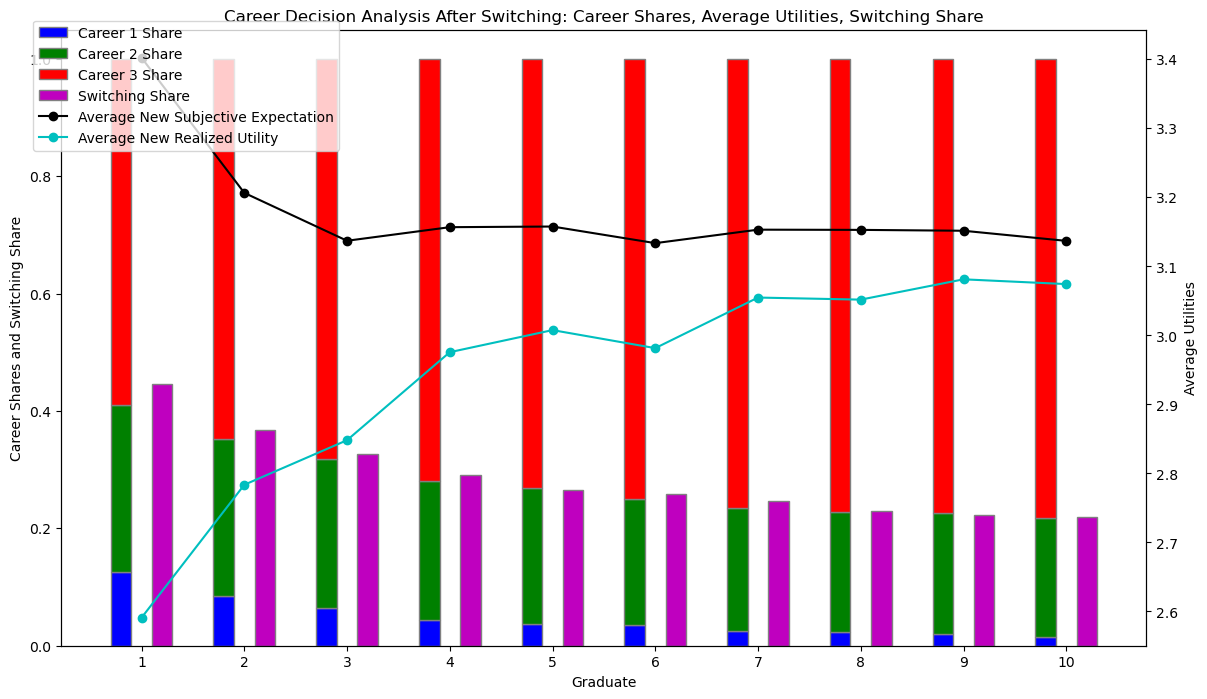

,Graduate,Career 1 Share,Career 2 Share,Career 3 Share,Average New Subjective Expectation,Average New Realized Utility,Switching Share
0,1,0.1255,0.2849,0.5896,3.402379,2.590895,0.4464
1,2,0.0845,0.2676,0.6479,3.206533,2.783535,0.3671
2,3,0.0646,0.2534,0.6820,3.137145,2.848157,0.3274
3,4,0.0433,0.2367,0.7200,3.156823,2.975677,0.2903
4,5,0.0374,0.2322,0.7304,3.157771,3.007675,0.2662
5,6,0.0354,0.2154,0.7492,3.133687,2.981550,0.2578
6,7,0.0244,0.2104,0.7652,3.153219,3.054843,0.2467
7,8,0.0239,0.2046,0.7715,3.152908,3.051837,0.2298
8,9,0.0202,0.2062,0.7736,3.151648,3.081267,0.2229
9,10,0.0151,0.2023,0.7826,3.136986,3.074353,0.2195


In [184]:
# Set seed for reproducibiliy
np.random.seed(11)
# New results are stored
new_career_shares = np.zeros((par.N, par.J))
average_new_subjective_expectation = np.zeros(par.N)
average_new_realized_utility = np.zeros(par.N)
# We introduce the switching share as well
switching_shares = np.zeros(par.N)


# Simulate switching decision
for i in range(par.N): 
    Fi = par.F[i] 
    # To store the new prior expected utilities for each career and simulation after considering the switching cost 
    new_prior_utilities = np.zeros((par.J, par.K))  
    # To store the realized utilities for the new career choices in each simulation after potentially switching careers
    new_realized_value = np.zeros(par.K)  

    for k in range(par.K): 
        # Getting initial chosen careers and realized utility for this
        current_career = chosen_careers[i, k]  
        current_realized_utility = realized_value[i, k]

        for j in range(par.J): 
            if j == current_career: # If the career is the same as the current career, the new prior utility is set to the realized utility. They now the exact utility. 
                new_prior_utilities[j, k] = current_realized_utility  
            else:  # if they switch
                friend_epsilon = np.random.normal(0, par.sigma, Fi)  # Draw random epsilon values for friends
                new_prior_utilities[j, k] = par.v[j] + np.mean(friend_epsilon) - par.c  # Calculate the new prior utility for other careers including the switching cost

        new_career_choice = np.argmax(new_prior_utilities[:, k])  # Determine the new optimal career choice based on the highest new prior expected utility
        new_realized_value[k] = ( # calculating the actual realized utility including switching opportunity
            current_realized_utility if new_career_choice == current_career
            else par.v[new_career_choice] + np.random.normal(0, par.sigma) - par.c  
        ) # Now we count when a graduate change career in order for us to calculate the switching share
        new_career_shares[i, new_career_choice] += 1 
        if new_career_choice != current_career: 
            switching_shares[i] += 1 

    average_new_subjective_expectation[i] = np.mean(np.max(new_prior_utilities, axis=0))  # Calculate the average new subjective expected utility for graduate i across all simulations
    average_new_realized_utility[i] = np.mean(new_realized_value)  # Calculate the average new realized utility for graduate i across all simulations
    new_career_shares[i] /= par.K  # Normalize the career shares by the total number of simulations
    switching_shares[i] /= par.K  # Normalize the switching shares by the total number of simulations


# Preparing new results
new_display_data = {
    'Graduate': np.arange(1, par.N + 1),
    'Career 1 Share': new_career_shares[:, 0],
    'Career 2 Share': new_career_shares[:, 1],
    'Career 3 Share': new_career_shares[:, 2],
    'Average New Subjective Expectation': average_new_subjective_expectation,
    'Average New Realized Utility': average_new_realized_utility,
    'Switching Share': switching_shares
}

# Creating a DataFrame for data we want to display
new_display_data_df = pd.DataFrame(new_display_data)

# Now we want to plot the results
fig, ax1 = plt.subplots(figsize=(14, 8))
width = 0.2
# Stacked bar plots for career shares
ax1.bar(new_display_data_df['Graduate'] - width, new_display_data_df['Career 1 Share'], color='b', width=width, edgecolor='grey', label='Career 1 Share')
ax1.bar(new_display_data_df['Graduate'] - width, new_display_data_df['Career 2 Share'], bottom=new_display_data_df['Career 1 Share'], color='g', width=width, edgecolor='grey', label='Career 2 Share')
ax1.bar(new_display_data_df['Graduate'] - width, new_display_data_df['Career 3 Share'], bottom=new_display_data_df['Career 1 Share'] + new_display_data_df['Career 2 Share'], color='r', width=width, edgecolor='grey', label='Career 3 Share')
# Bar plot for switching share
ax1.bar(new_display_data_df['Graduate'] + width, new_display_data_df['Switching Share'], color='m', width=width, edgecolor='grey', label='Switching Share')
# Line plots for Average New Subjective Expectation and Average New Realized Utility
ax2 = ax1.twinx()
ax2.plot(np.arange(1, par.N + 1), new_display_data_df['Average New Subjective Expectation'], color='k', marker='o', label='Average New Subjective Expectation')
ax2.plot(np.arange(1, par.N + 1), new_display_data_df['Average New Realized Utility'], color='c', marker='o', label='Average New Realized Utility')
# Setting up details for the plot
ax1.set_xlabel('Graduate')
ax1.set_ylabel('Career Shares and Switching Share')
ax2.set_ylabel('Average Utilities')
ax1.set_xticks(np.arange(1, par.N + 1))
ax1.set_xticklabels(np.arange(1, par.N + 1))
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Career Decision Analysis After Switching: Career Shares, Average Utilities, Switching Share')

plt.show()

# Displaying table 
new_display_data_df


Comment: Different from 2.2 we see bigger shares in career 3 and less in career 2 and 1. We see falling switching shares as number of friends rises, indicating that with more initial knowledge(friends) there is less need to change from the initial choice. We also see lower discreptancy between subjective expectation utility and realized utility. Generally we see higher realized utility for all graduates - indicating that the switching opportunity have positive gains for the utility outcome of the career choosing process. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [185]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

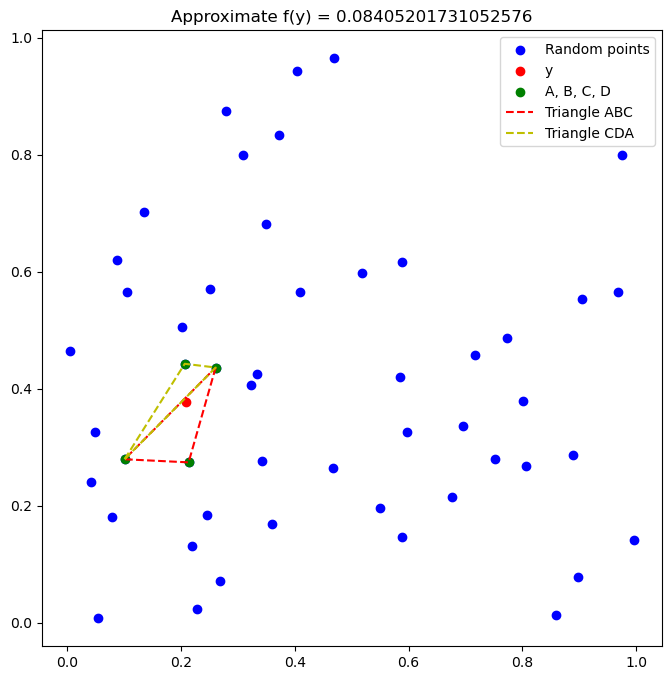

In [186]:
# Initialize variables to store the points A, B, C, and D
A, B, C, D = None, None, None, None

# Initialize distances to a large number
dist_A, dist_B, dist_C, dist_D = float('inf'), float('inf'), float('inf'), float('inf')

# Now we find points A, B, C, and D
# We do this by iterating through each point in X to find the closest points to y who at the same time live up to the constraints
# Only points who are closer than the prior and who live up to the constraints will be stored. So if none live up to the constraints, the variable will return 'None'

for x in X:
    dist = (x[0] - y[0])**2 + (x[1] - y[1])**2

    if x[0] > y[0] and x[1] > y[1] and dist < dist_A:
        A = x
        dist_A = dist
    elif x[0] > y[0] and x[1] < y[1] and dist < dist_B:
        B = x
        dist_B = dist
    elif x[0] < y[0] and x[1] < y[1] and dist < dist_C:
        C = x
        dist_C = dist
    elif x[0] < y[0] and x[1] > y[1] and dist < dist_D:
        D = x
        dist_D = dist

# Then we set up a function that can calculate barycentric coordinates. Here we plug in for ABC
def barycentric_coordinates(A, B, C, y):
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Setting up a function that can check if a point is inside a triangle by checking if barycentric coordinates are between 0 and 1
def is_inside_triangle(r1, r2, r3):
    return (0 <= r1 <= 1) and (0 <= r2 <= 1) and (0 <= r3 <= 1)

# Defining a dummy function f
# Defining the function f is necessary to get values in the interpolation process. We choose a very simple function f(x, y) = x + y
def f(point): 
    return point[0] + point[1]

# Now we use the defined functions computing barycentric coordinates for the traingles and checking if y is inside the triangles
# Checking if points A, B, C, and D are found(if they live up to the constraints) otherwise we return NaN
if A is not None and B is not None and C is not None and D is not None:
    # Computing barycentric coordinates for triangle ABC
    rA1, rA2, rA3 = barycentric_coordinates(A, B, C, y)

    # Checking if y is inside triangle ABC
    if is_inside_triangle(rA1, rA2, rA3):
        inside_triangle = 'ABC'
        # Coordinates for CDA to NaN as they are not needed. 
        rC1, rC2, rC3 = np.nan, np.nan, np.nan
    else: # We only check if y is inside CDA if y is not inside ABC
        # Computing barycentric coordinates for triangle CDA
        rC1, rC2, rC3 = barycentric_coordinates(C, D, A, y)

        # Checking if y is inside triangle CDA
        if is_inside_triangle(rC1, rC2, rC3):
            inside_triangle = 'CDA'
        else:
            result = np.nan
            triangle_used = None
else:
    result = np.nan
    triangle_used = None
# Plotting the points and triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Random points')
plt.scatter(y[0], y[1], c='red', label='y')
if A is not None and B is not None and C is not None and D is not None:
    plt.scatter([A[0], B[0], C[0], D[0]], [A[1], B[1], C[1], D[1]], c='green', label='A, B, C, D')
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'r--', label='Triangle ABC')
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'y--', label='Triangle CDA')

plt.legend()
plt.title(f'Approximate f(y) = {result}')
plt.show()


**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [187]:
# We calculated everything we needed in 3.1
# Displaying the results
print(f'Barycentric coordinates of y with respect to ABC: (rA1, rA2, rA3) = ({rA1}, {rA2}, {rA3})')
print(f'Barycentric coordinates of y with respect to CDA: (rC1, rC2, rC3) = ({rC1}, {rC2}, {rC3})')
print(f'y is located inside triangle: {inside_triangle}')


Barycentric coordinates of y with respect to ABC: (rA1, rA2, rA3) = (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Barycentric coordinates of y with respect to CDA: (rC1, rC2, rC3) = (nan, nan, nan)
y is located inside triangle: ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [188]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [189]:
# Initialize barycentric coordinates, to calculate with new function 
rA1 = rA2 = rA3 = rC1 = rC2 = rC3 = np.nan

# Find A, B, C, and D
if A is not None and B is not None and C is not None and D is not None:
    # Compute barycentric coordinates for triangle ABC
    rA1, rA2, rA3 = barycentric_coordinates(A, B, C, y)
    
    # Checking if y is inside triangle ABC
    if is_inside_triangle(rA1, rA2, rA3):
        result = rA1 * f(A) + rA2 * f(B) + rA3 * f(C)
    else:
        # Computing barycentric coordinates for triangle CDA
        rC1, rC2, rC3 = barycentric_coordinates(C, D, A, y)
        
        # Check if y is inside triangle CDA
        if is_inside_triangle(rC1, rC2, rC3):
            result = rC1 * f(C) + rC2 * f(D) + rC3 * f(A)
        else:
            result = np.nan
else:
    result = np.nan

# Calculating true value
true_value = f(y)

# Displaying the results
print(f'Interpolated value of f(y): {result}')
print(f'True value of f(y): {true_value}')



Interpolated value of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [175]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

Point y: (0.2, 0.2), Interpolated value: 0.04032631372248057, True value: 0.04000000000000001
Point y: (0.8, 0.2), Interpolated value: 0.15874233999349835, True value: 0.16000000000000003
Point y: (0.8, 0.8), Interpolated value: nan, True value: 0.6400000000000001
Point y: (0.8, 0.2), Interpolated value: 0.15874233999349835, True value: 0.16000000000000003
Point y: (0.5, 0.5), Interpolated value: 0.2512901561119622, True value: 0.25


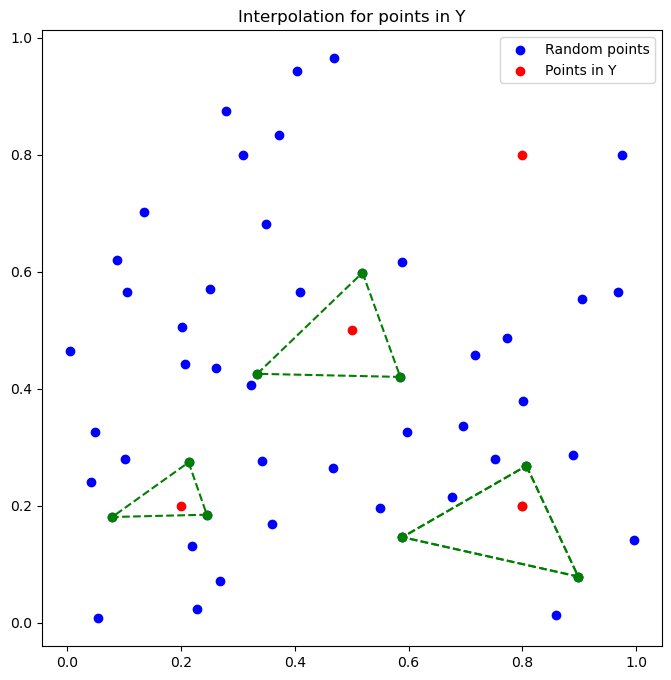

In [190]:
# We introduce a new function for looping through the different points in Y
# Giving us a function to find points A, B, C, D and compute the interpolated value for a given point
def interpolate_for_y(y, X):
    A, B, C, D = None, None, None, None
    dist_A, dist_B, dist_C, dist_D = float('inf'), float('inf'), float('inf'), float('inf')
    
    for x in X:
        dist = (x[0] - y[0])**2 + (x[1] - y[1])**2
        
        if x[0] > y[0] and x[1] > y[1] and dist < dist_A:
            A = x
            dist_A = dist
        elif x[0] > y[0] and x[1] < y[1] and dist < dist_B:
            B = x
            dist_B = dist
        elif x[0] < y[0] and x[1] < y[1] and dist < dist_C:
            C = x
            dist_C = dist
        elif x[0] < y[0] and x[1] > y[1] and dist < dist_D:
            D = x
            dist_D = dist

    # Initialize barycentric coordinates, to calculate new barycentric coordinates for the new points
    rA1 = rA2 = rA3 = rC1 = rC2 = rC3 = np.nan

    # We check if A, B, C, and D are found
    if A is not None and B is not None and C is not None and D is not None:
        # Computing barycentric coordinates for triangle ABC
        rA1, rA2, rA3 = barycentric_coordinates(A, B, C, y)
        
        # Checking if y is inside triangle ABC
        if is_inside_triangle(rA1, rA2, rA3):
            result = rA1 * f(A) + rA2 * f(B) + rA3 * f(C)
            return result, A, B, C, None
        else:
            # Computing barycentric coordinates for triangle CDA
            rC1, rC2, rC3 = barycentric_coordinates(C, D, A, y)
            
            # Checking if y is inside triangle CDA
            if is_inside_triangle(rC1, rC2, rC3):
                result = rC1 * f(C) + rC2 * f(D) + rC3 * f(A)
                return result, C, D, A, None
            else:
                return np.nan, None, None, None, None
    else:
        return np.nan, None, None, None, None

# We introduce a list to store the results for each point in Y
results = []

# Then we iterate over each point y in the set Y, calling the interpolate_for_y function to get the interpolated value, A, B, C, D and calculating the true value
for y in Y:
    interpolated_value, A, B, C, D = interpolate_for_y(y, X)
    true_value = f(y)
    
    # All of this is appended in the list for every y, its interpolated value, its true value, and the points A, B, C, D
    results.append((y, interpolated_value, true_value, A, B, C, D))

# Now to show the results we simply loop through the results list and print computations for each point y in Y
for y, interpolated_value, true_value, _, _, _, _ in results: # Here we dont want the A,B,C,D which is why we leave the last 4 blank
    print(f'Point y: {y}, Interpolated value: {interpolated_value}, True value: {true_value}')

# Now we want to plot the whole the new points and the corresponding traingles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Random points')
plt.scatter([y[0] for y in Y], [y[1] for y in Y], c='red', label='Points in Y')

# We loop to plot the different y and their corresponding computations captured in results
for y, interpolated_value, true_value, A, B, C, D in results: # Now we want everything in results
    if A is not None and B is not None and C is not None and D is None: 
        plt.scatter([A[0], B[0], C[0]], [A[1], B[1], C[1]], c='green')
        plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'g--')
    elif A is not None and C is not None and D is not None:
        plt.scatter([C[0], D[0], A[0]], [C[1], D[1], A[1]], c='green')
        plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'g--')

plt.legend()
plt.title('Interpolation for points in Y')
plt.show()


We see the new red points are the points from Y with corresponding green trangles on 3(4 because of two identical points) of them. The green triangles are the 3 are the sets of three nearest points in X. We see that for point (0.8;0.8) there is no interpolated value and that there is no green triangle around the point. Both meaning that the point does not lie within ABC og CDA calculated for the point.  
